In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

In [3]:
df=pd.read_csv('/home/diplopia/excel analyze/data/한계돌파_내역_2024101008.csv')
df=df.fillna(value=str(0))
df['후원시간'] = pd.to_datetime(df['후원시간'])
df['hour'] = df['후원시간'].dt.hour
df['hour'] = [str(i) for i in df['hour']]
df['day'] = df['후원시간'].dt.day
re_df = df[(df['참여BJ'] != '노블컴퍼니(대표BJ)') & (df['참여BJ'] != '콩승아') & (df['참여BJ'] != '0') & (df['후원하트']>=100)]


In [4]:
vip_list=[]
for i in re_df['후원 아이디(닉네임)']:
    vip_list.append(i.split('(')[1][:-1])

re_df['후원 아이디(닉네임)']=vip_list

/tmp/ipykernel_76734/8002336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['후원 아이디(닉네임)']=vip_list


In [5]:
re_df

,후원시간,후원 아이디(닉네임),후원하트,참여BJ,하트점수,기여도,기타,hour,day
0,2024-10-02 03:09:52,ෆ젖문가ෆ,1445,우리선아(병가),1445,1445,0,3,2
1,2024-10-02 03:08:53,ෆ젖문가ෆ,1445,린린(병가),1445,2890,0,3,2
3,2024-10-02 03:06:32,✨시하~지원~뇌졸증✨,500,린린(병가),500,500,0,3,2
4,2024-10-02 02:57:32,ෆ젖문가ෆ,1200,수하,1200,43413,수정,2,2
5,2024-10-02 02:57:22,ෆ젖문가ෆ,1445,바니빈,1445,2890,0,2,2
...,...,...,...,...,...,...,...,...,...
411,2024-10-01 15:25:19,ZO지GO,3113,서와와,3113,9339,수정,15,1
412,2024-10-01 15:25:11,ZO지GO,2323,서와와,2323,6969,수정,15,1
413,2024-10-01 15:23:44,소야ღ푸시,1500,소야,1500,1500,0,15,1
414,2024-10-01 15:23:21,ZO지GO,1486,서와와,1486,4458,수정,15,1


## 1. 출연자별 총 하트 합계 그래프

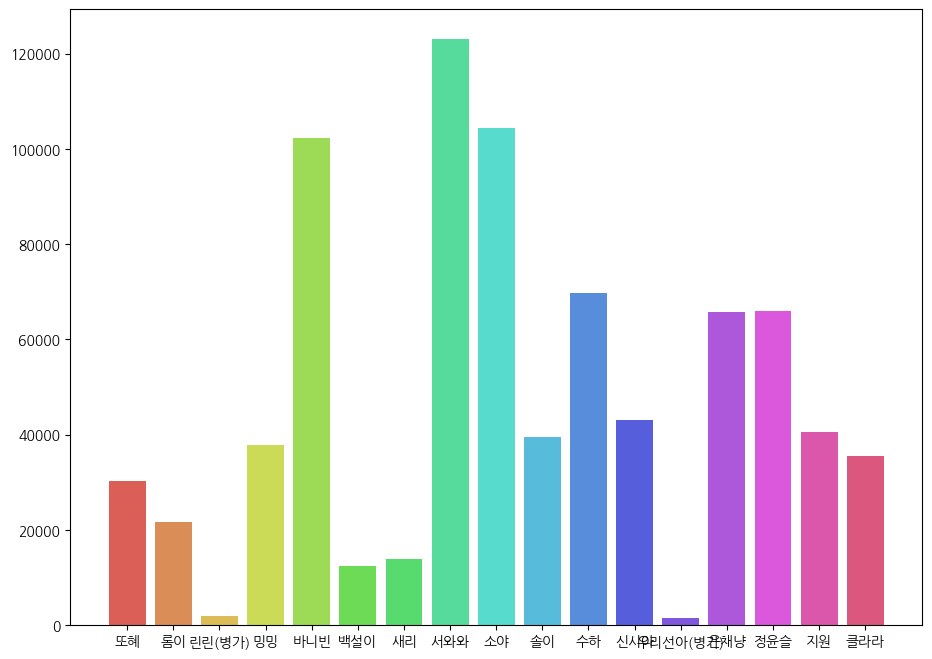

In [6]:
BJ_list = sorted(list(set(re_df['참여BJ'])))

BJ_hearts=[]
for i in BJ_list:
    hearts = re_df[re_df['참여BJ']==i]['후원하트'].sum()
    BJ_hearts.append(hearts)

# plt.rc('font',family='NanumGothic')
colors = sns.color_palette('hls',len(BJ_hearts))
plt.figure(figsize=(11,8))
plt.bar(BJ_list,BJ_hearts,color=colors)
plt.show()

In [7]:
BJ_list

['또혜',
 '롬이',
 '린린(병가)',
 '밍밍',
 '바니빈',
 '백설이',
 '새리',
 '서와와',
 '소야',
 '솔이',
 '수하',
 '신시아',
 '우리선아(병가)',
 '은채냥',
 '정윤슬',
 '지원',
 '클라라']

### 1-1. 출연자가 받은 하트 통계

In [8]:
#1회차 BJ 평균
avg = sum(BJ_hearts)/len(BJ_list)
median = np.median(BJ_hearts)
max = np.max(BJ_hearts)
min = np.min(BJ_hearts)
lower25 = np.percentile(BJ_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(BJ_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  47632 
중위값 :  39454.0 
하위25% :  21746 
상위25% :  65950 
최대값 :  123145 
최솟값 :  1445


## 2. 시청자별 총 하트 하계 그래프

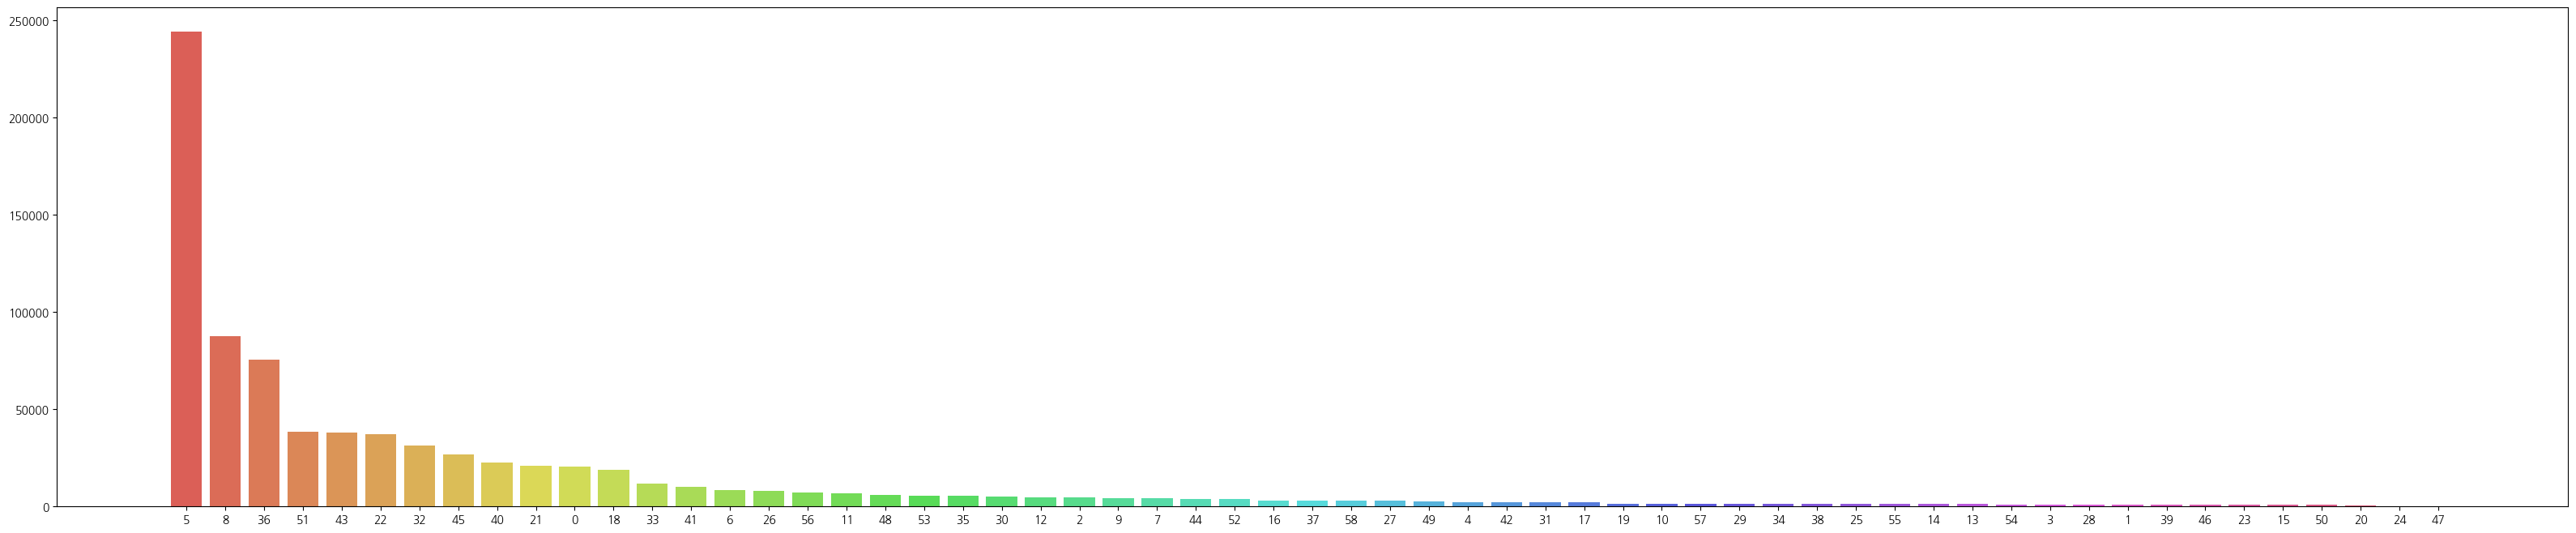

In [9]:
VIP_list = sorted(list(set(re_df['후원 아이디(닉네임)'])))

VIP_hearts=[]
for i in VIP_list:
    hearts = re_df[re_df['후원 아이디(닉네임)']==i]['후원하트'].sum()
    VIP_hearts.append(hearts)

new_df = pd.DataFrame({'ID':[str(i) for i in range(len(VIP_list))],
                        'vip_name':VIP_list,
                       'hearts':VIP_hearts})

sort_df = new_df.sort_values('hearts',ascending=False)
# for i,j in zip(VIP_list,VIP_hearts):
#     print(i,j)
# list(sort_df.index)
colors = sns.color_palette('hls',len(VIP_hearts))
plt.figure(figsize=(40,8))
plt.bar(sort_df['ID'],sort_df['hearts'],color=colors)
plt.show()
# sns.barplot(data=sort_df,x='ID',y='hearts',order=sort_df.sort_values('hearts'))

### 2-1. 시청자가 후원한 하트 통계

In [10]:
#1회차 시청자 평균
avg = sum(VIP_hearts)/len(VIP_list)
median = np.median(VIP_hearts)
max = np.max(VIP_hearts)
min = np.min(VIP_hearts)
lower25 = np.percentile(VIP_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(VIP_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  13725 
중위값 :  3063.0 
하위25% :  1372 
상위25% :  8599 
최대값 :  244382 
최솟값 :  100


### 2-2. 후원을 많이한 시청자 Rank17

In [11]:
sort_df[:17]

,ID,vip_name,hearts
5,5,ZO지GO,244382
8,8,ෆ젖문가ෆ,87605
36,36,바니빈ෆ눈먼천사,75333
51,51,쫄보b,38398
43,43,소야ღ푸시,38210
22,22,✿소울,37303
32,32,드렁큰베어⚘,31344
45,45,은채궁에하트터는김루팡,26777
40,40,붘칰밬칰,22425
21,21,✨은채냥❤️호랑✨,21045


In [12]:
time_df = re_df.groupby(['day','hour'])['후원하트'].sum().reset_index()
# time_df['hour']=[str(i) for i in time_df['hour']]


In [13]:
time_df

,day,hour,후원하트
0,1,15,46598
1,1,16,34556
2,1,17,90632
3,1,18,59857
4,1,19,82780
5,1,20,101301
6,1,21,139910
7,1,22,84571
8,1,23,40591
9,2,0,37882


## 3. 시간별 총 하트 합계 그래프

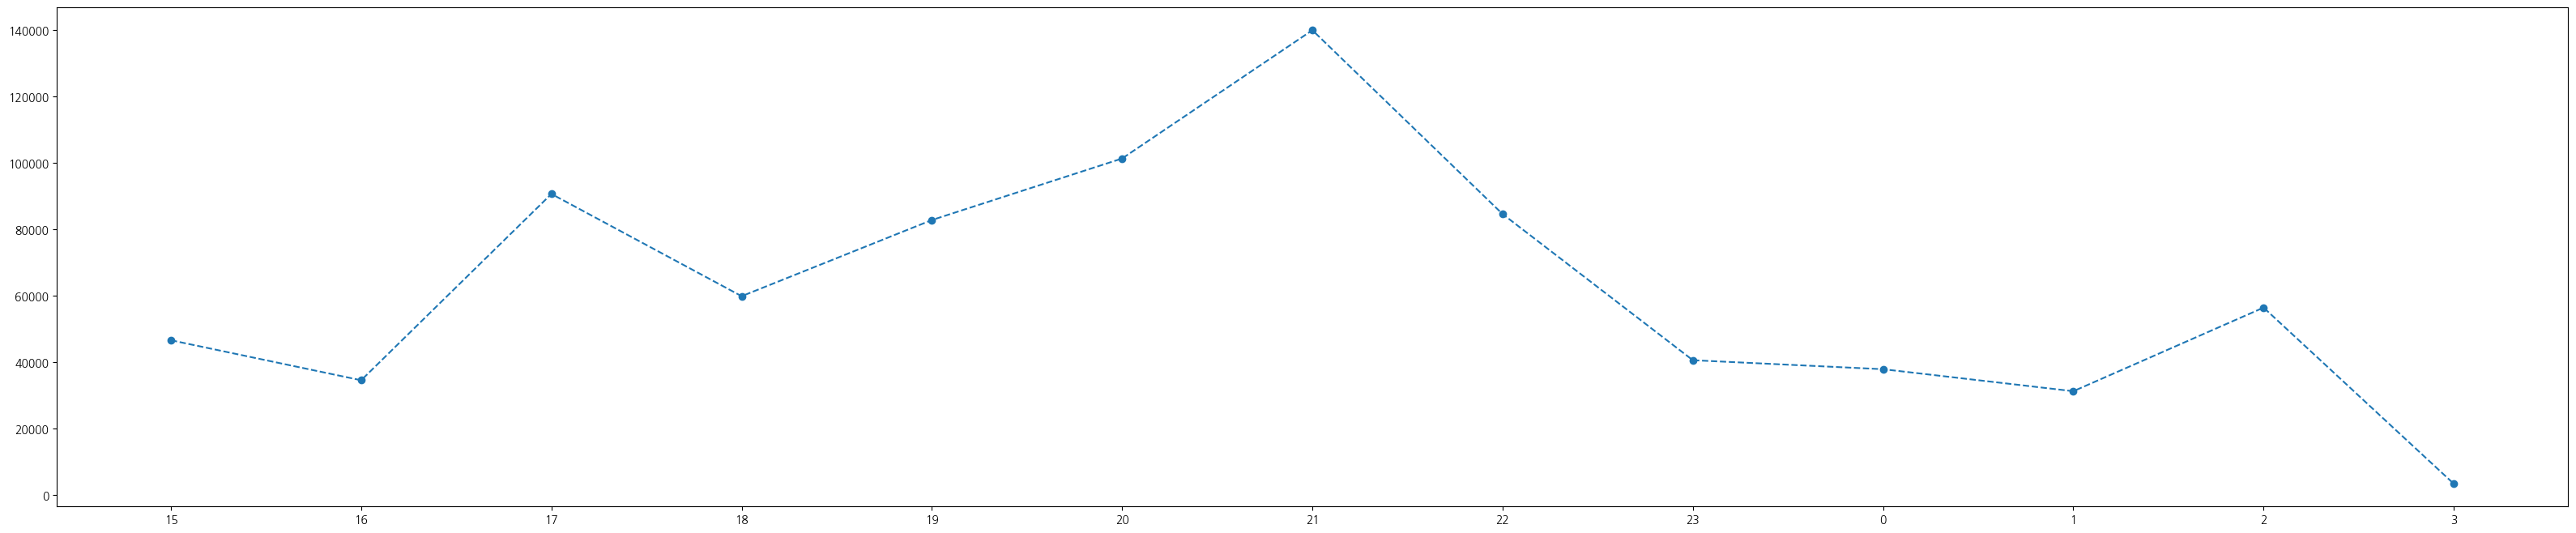

In [14]:
plt.figure(figsize=(40,8))
plt.plot(time_df['hour'],time_df['후원하트'],linestyle='--',marker='o')
plt.show()

## 4. 출연자별 하트 시계열 그래프

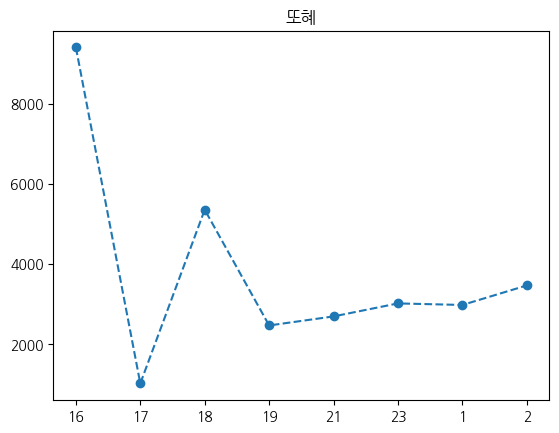

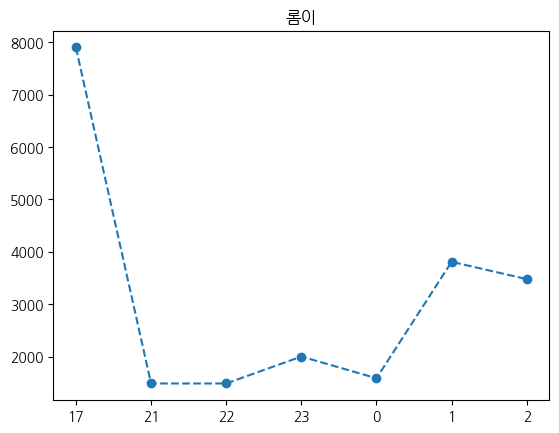

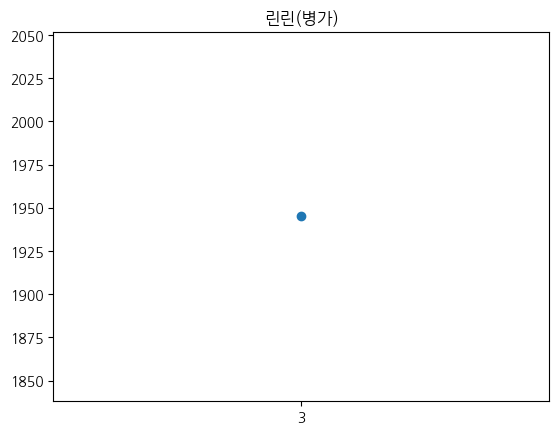

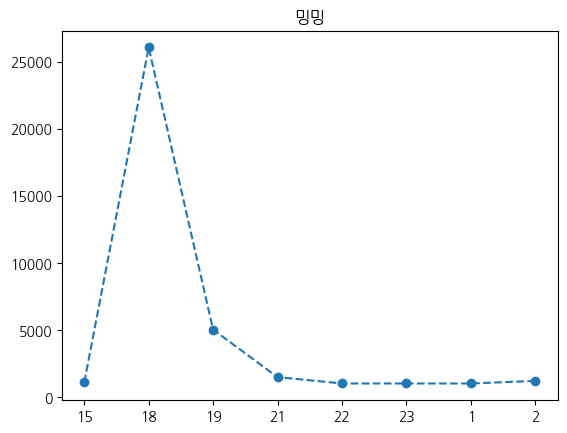

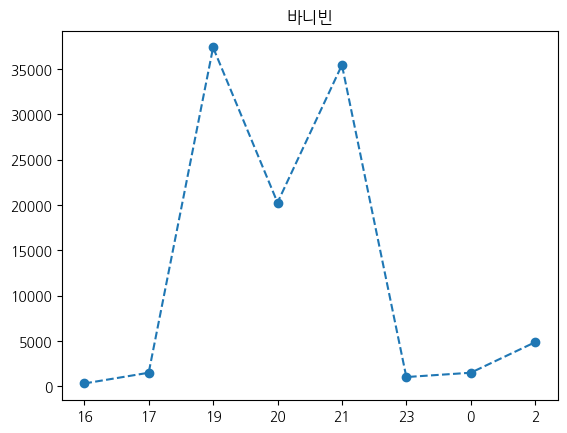

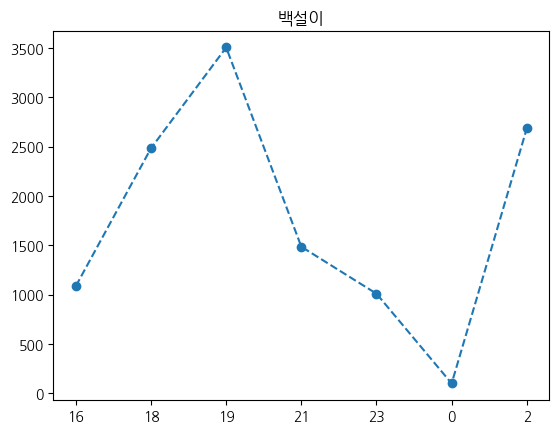

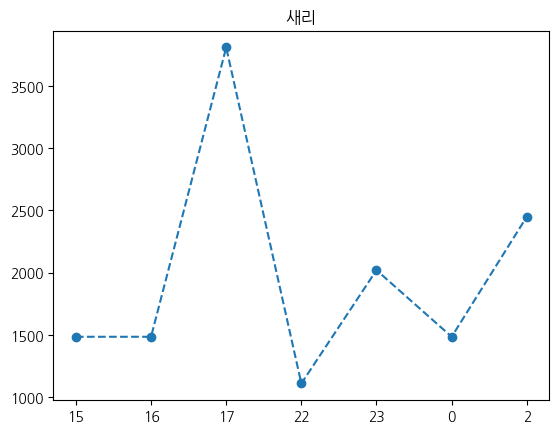

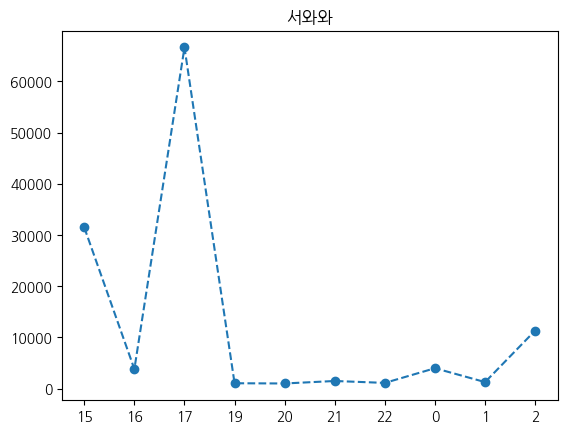

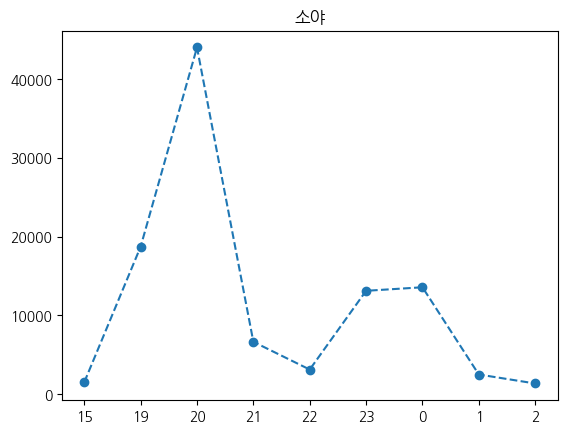

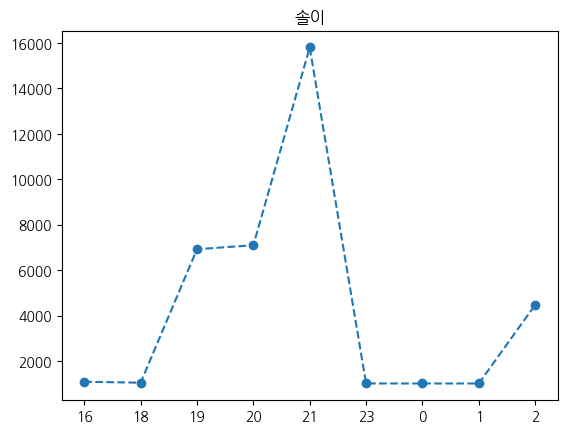

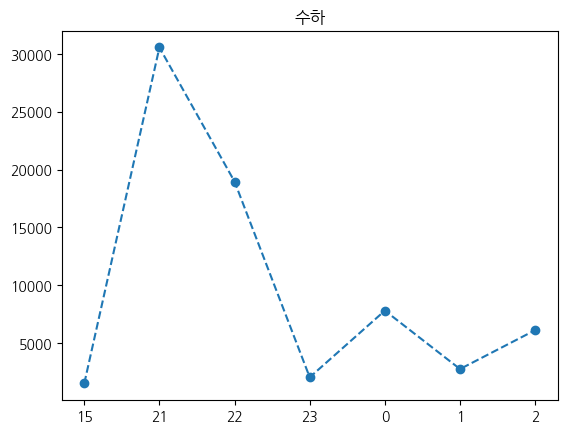

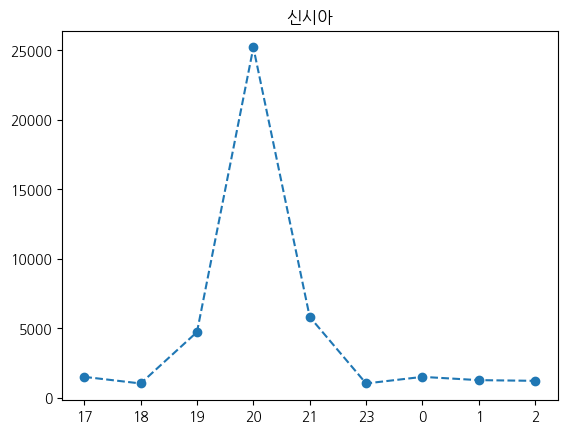

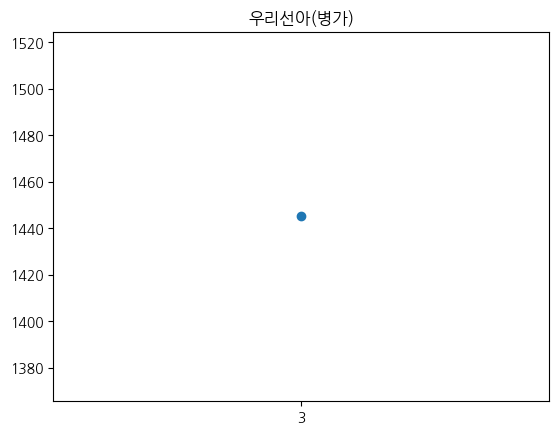

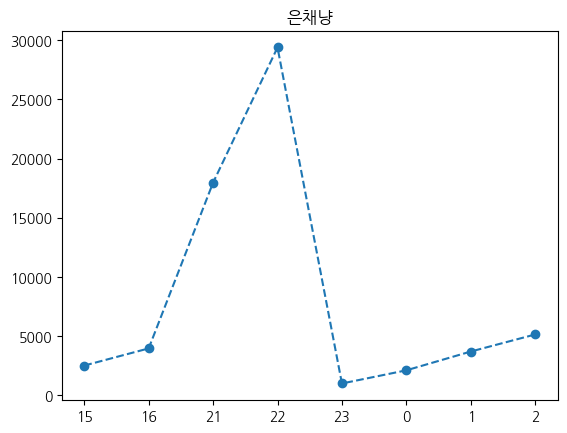

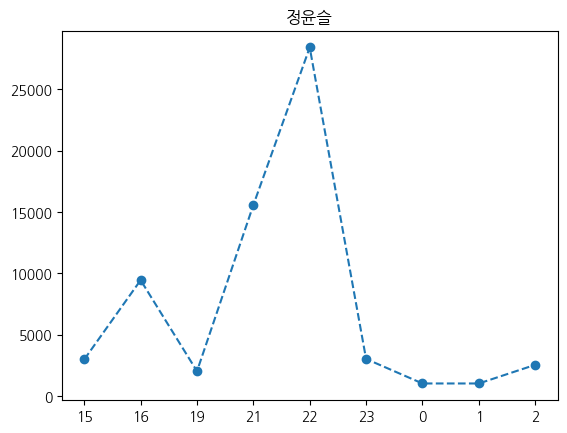

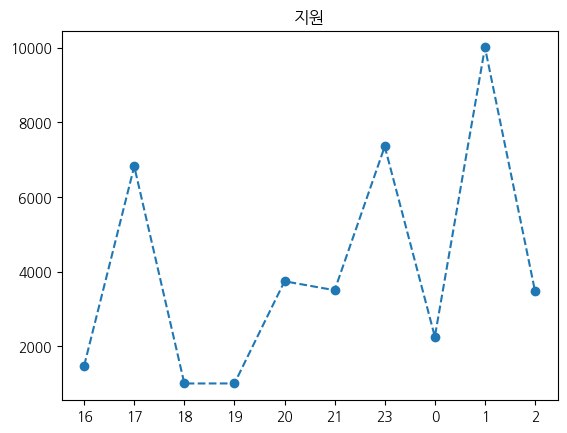

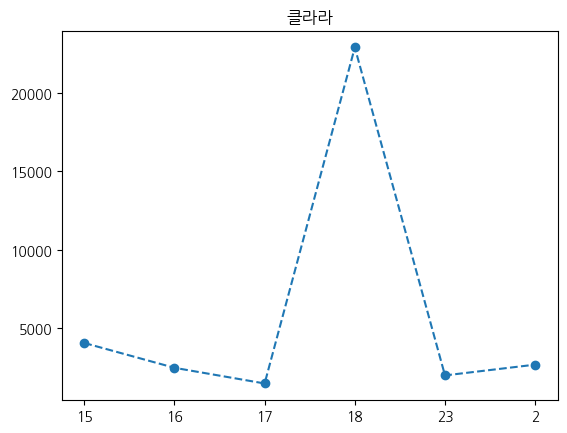

In [15]:
for i in BJ_list:
    BJ_time_df = re_df[re_df['참여BJ']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    plt.plot(BJ_time_df['hour'],BJ_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

## 5. 시청자별 하트후원 시계열 그래프

*반갑다친구야*


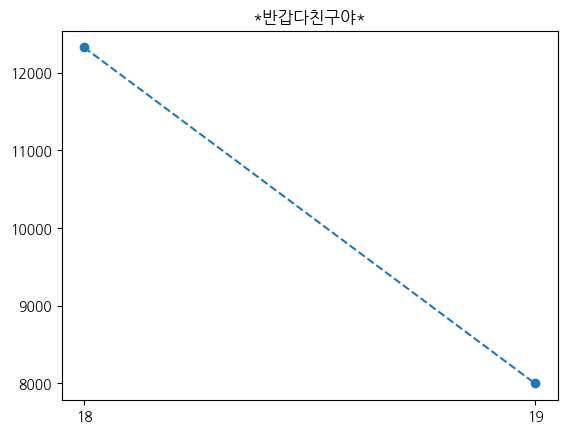

1


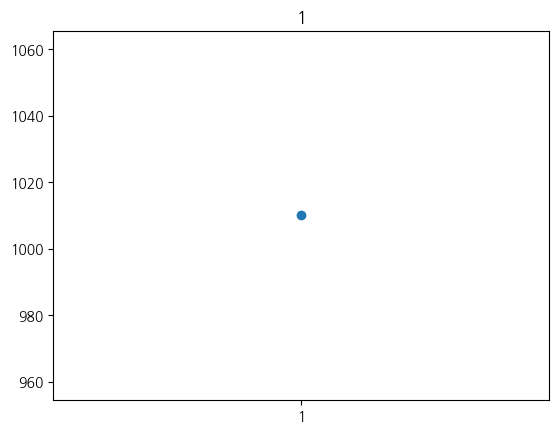

1001린부리날❤️뮤즈❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


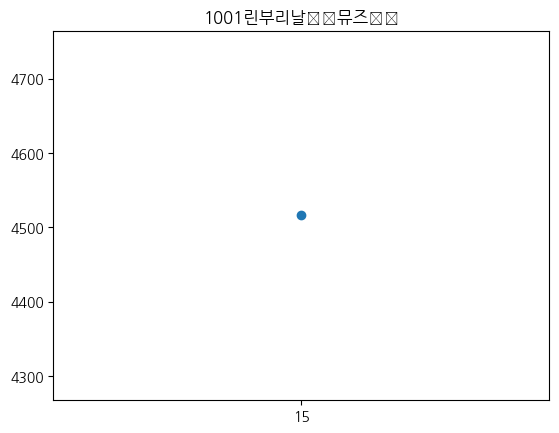

3728130242


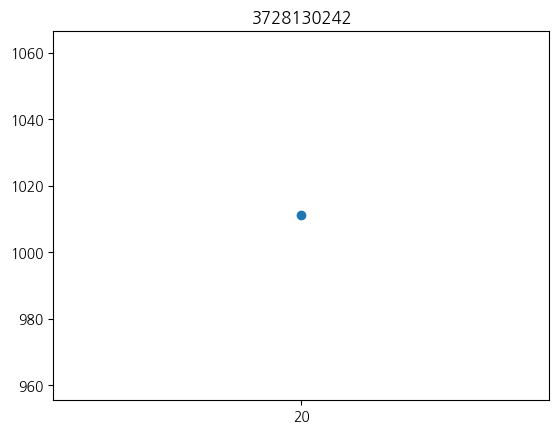

GI⭐이노베이션


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


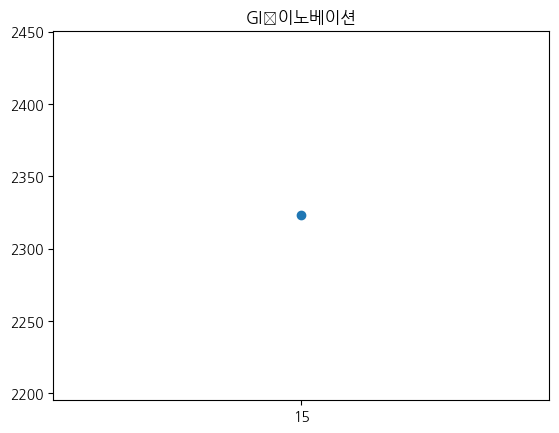

ZO지GO


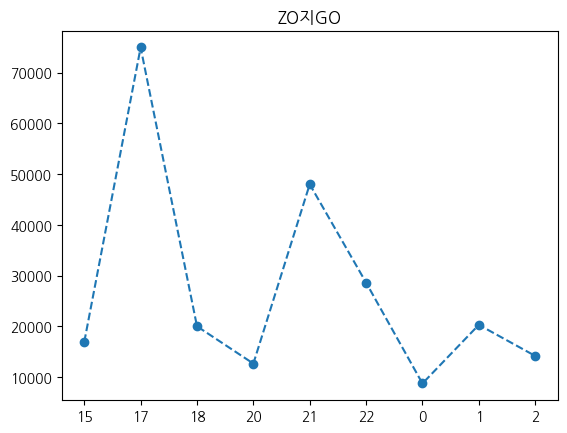

[AV]쪼아오빠달려붕붕


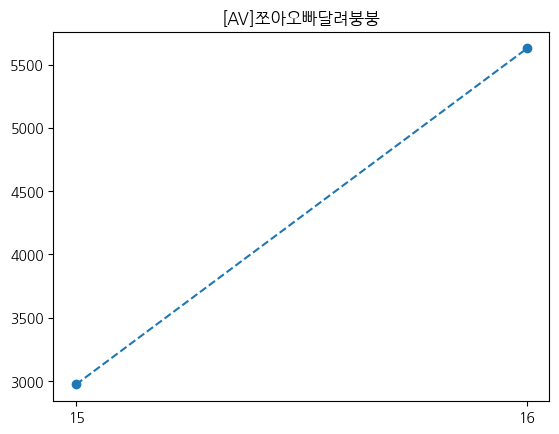

one+♡♡


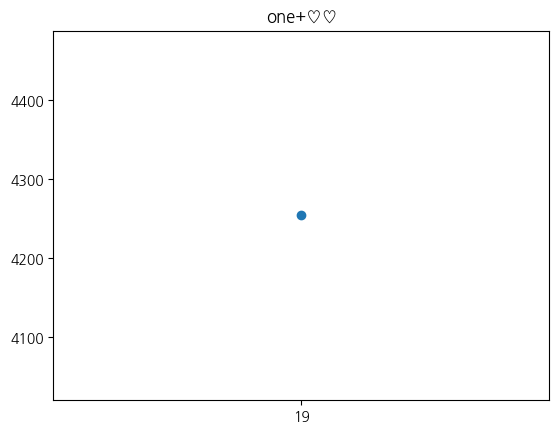

ෆ젖문가ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


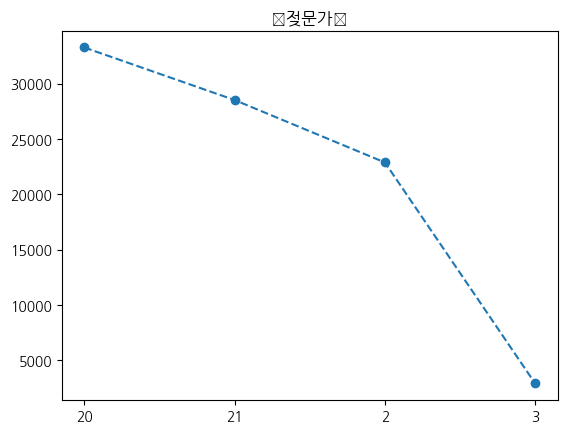

ღ롬이ღ예쁘다


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


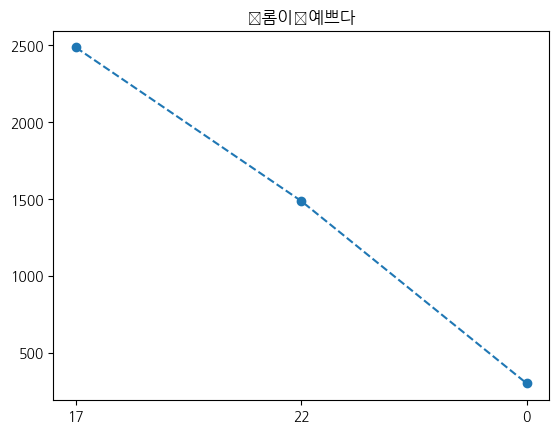

ღ몰랑ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


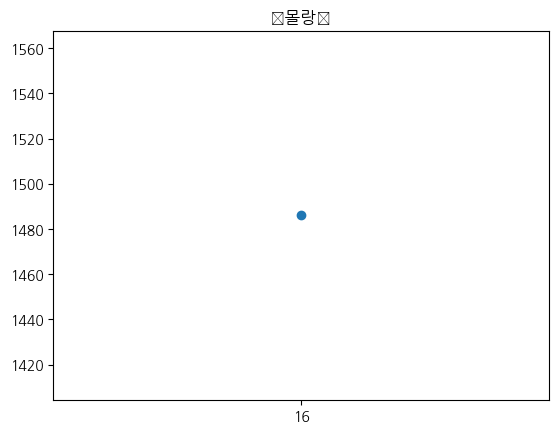

ღ시아ღTT


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


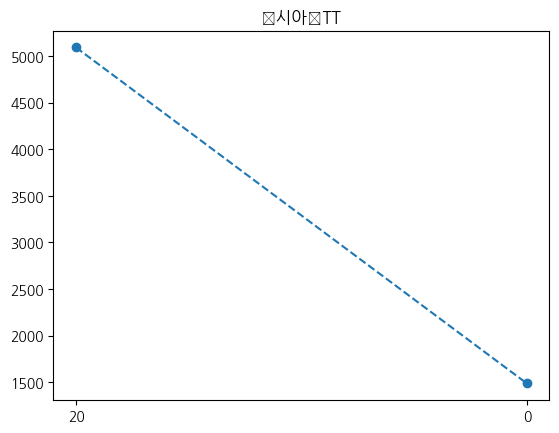

☆젖문다☆


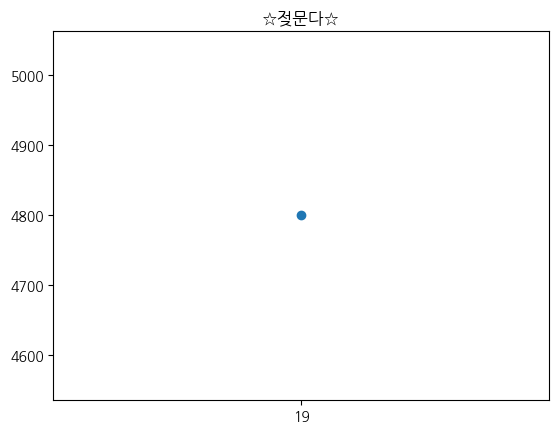

♔레나❤️맹구


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9812 (\N{WHITE CHESS KING}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


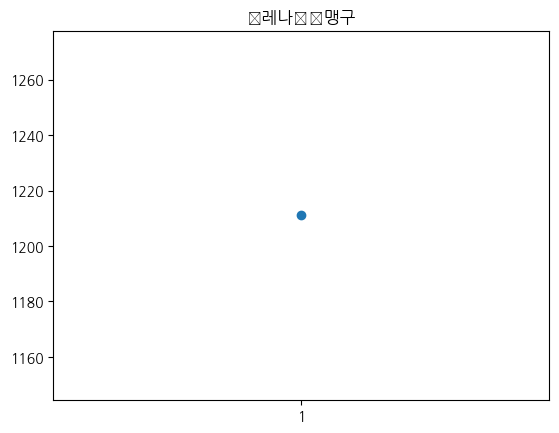

⛧BJ우리⛧테디


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


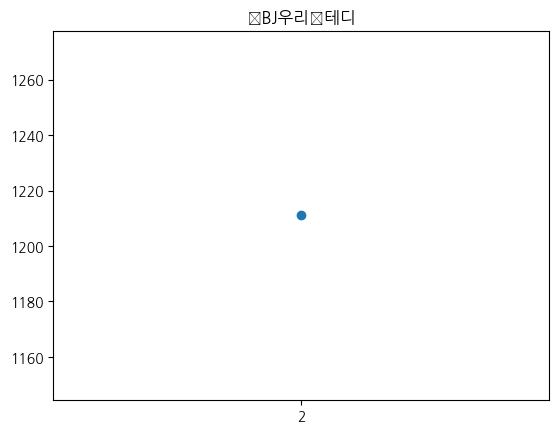

⛧아픈발가락궤새리⛧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


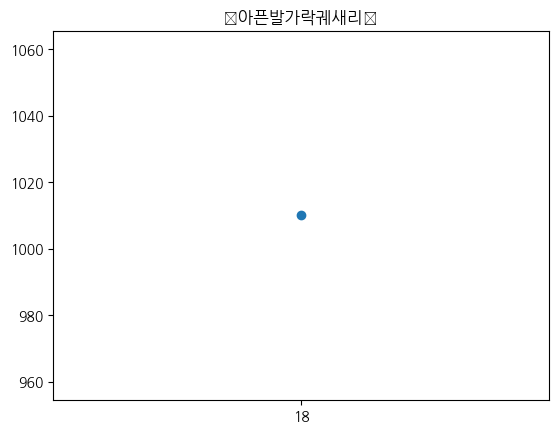

⛧아픈발가락궤새리꼬장⛧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


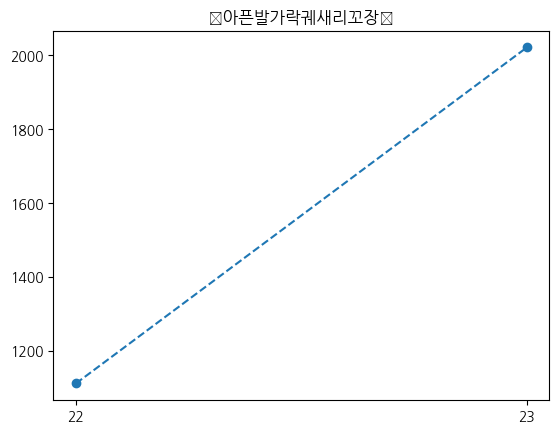

✧현생에서바른생활중✧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10023 (\N{WHITE FOUR POINTED STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


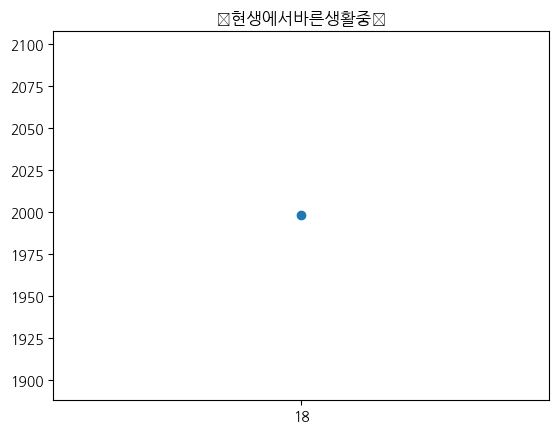

✨몰랑~지원~뇌졸증✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


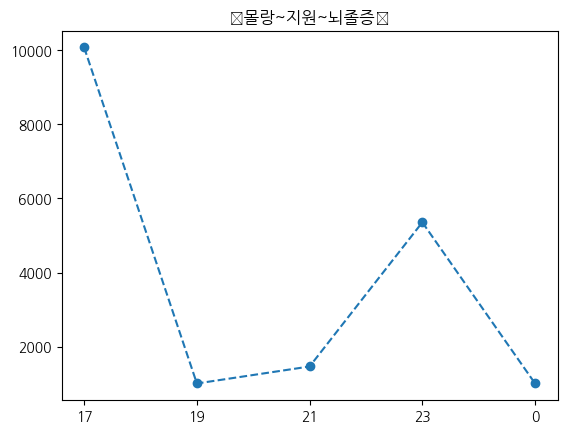

✨사장™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


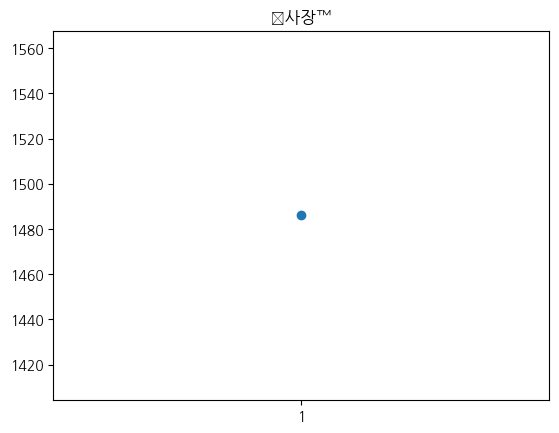

✨시하~지원~뇌졸증✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


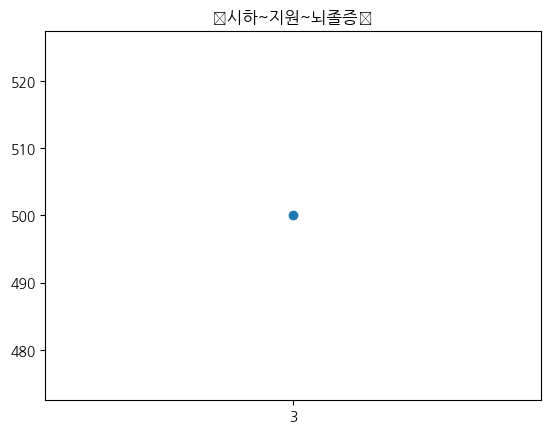

✨은채냥❤️호랑✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


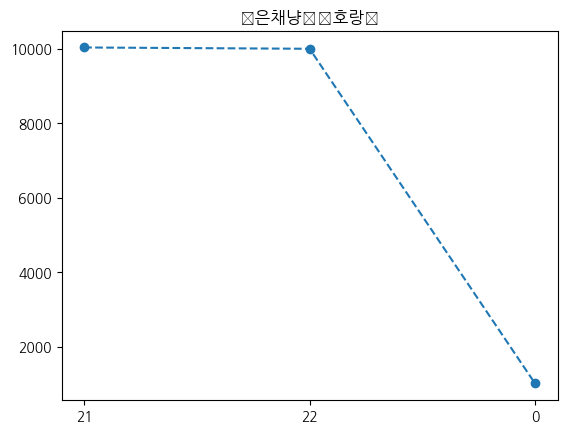

✿소울


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


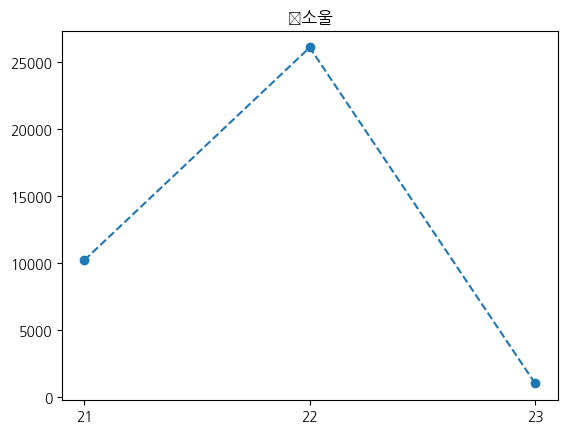

❤️Bj라미❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


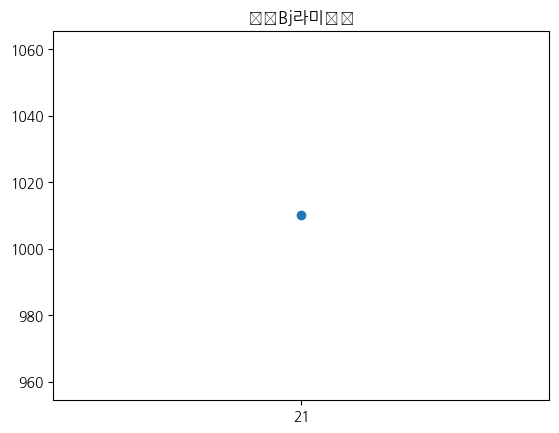

❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


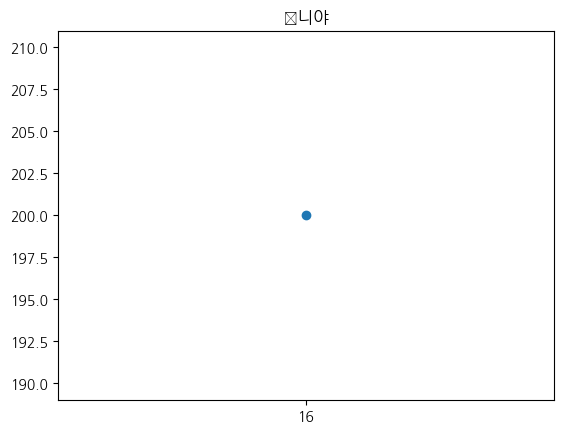

⭐금시월♡헬레빗⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


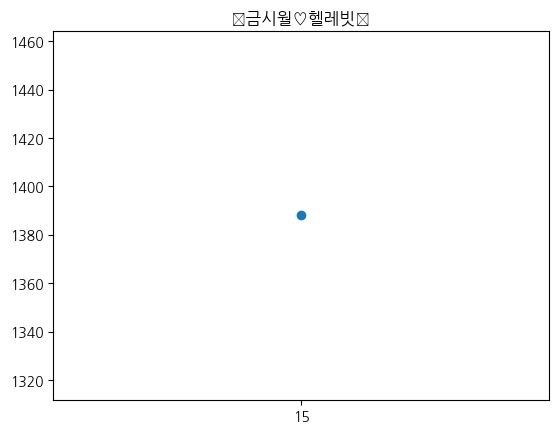

⭐소다_동탄큰손➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


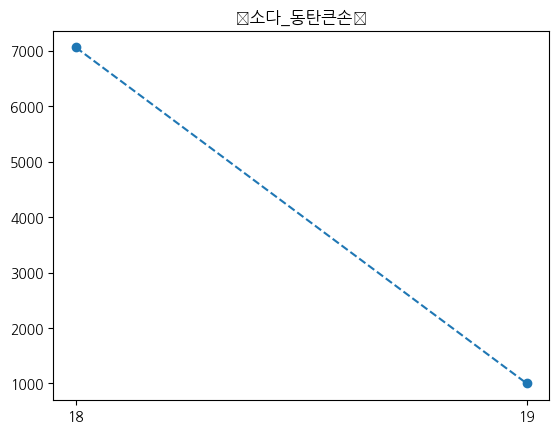

간편로그인상태


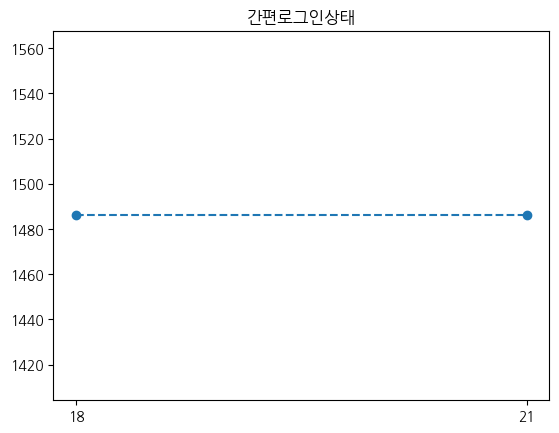

고민시ღ엔비™⛧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


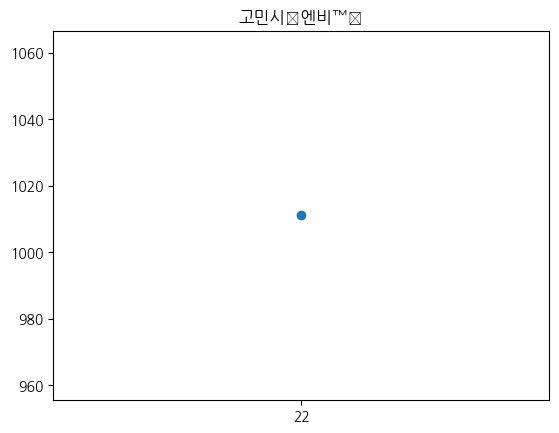

나오PANDA


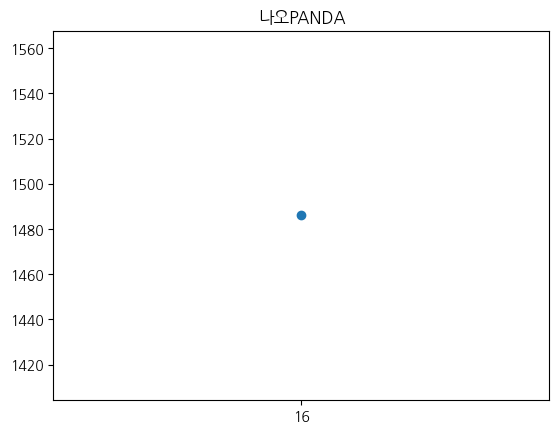

나이키매니아문래


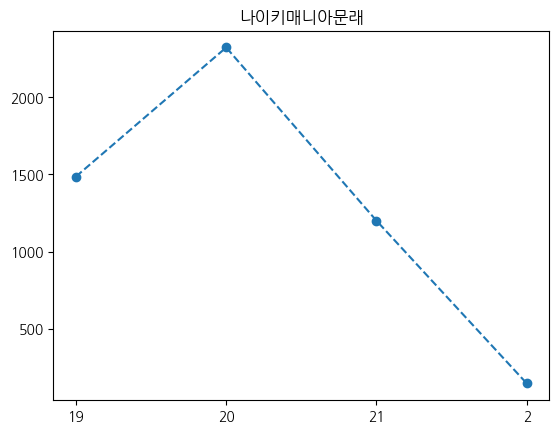

너만❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


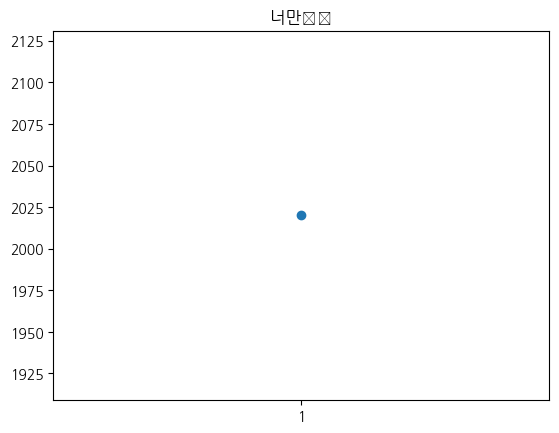

드렁큰베어⚘


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9880 (\N{FLOWER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


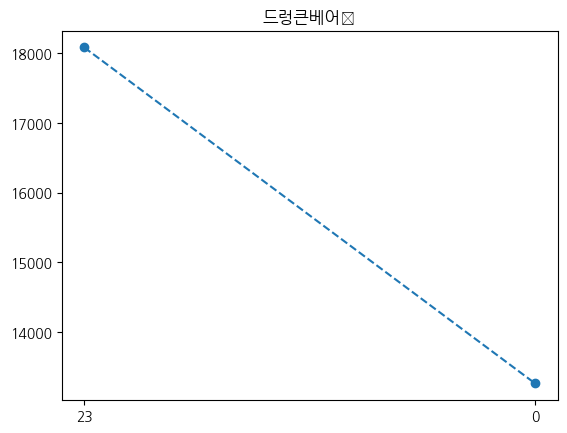

또혜밖에모름❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


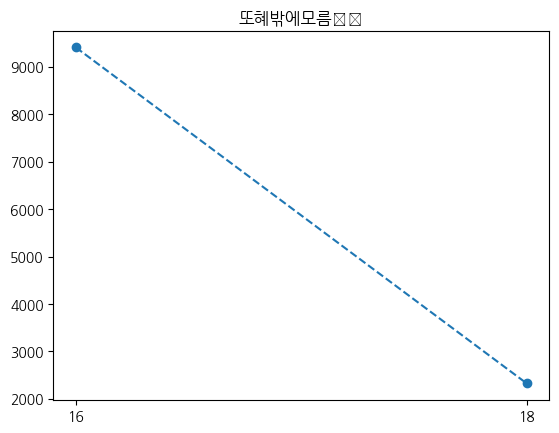

띠띠♬박하은❤️Milk✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


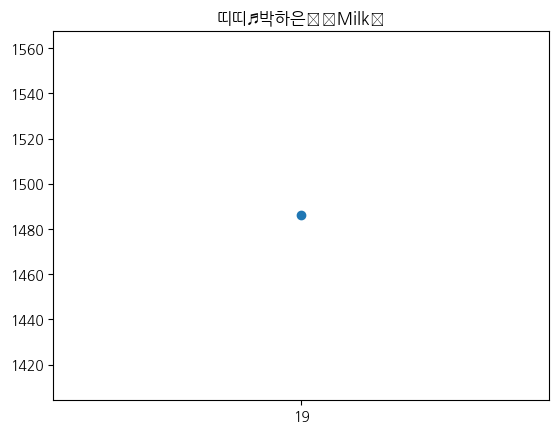

미키™


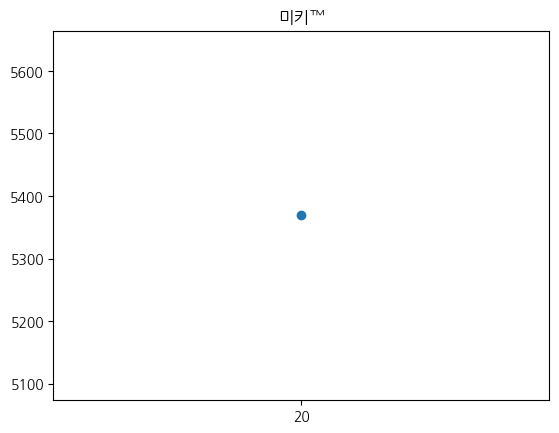

바니빈ෆ눈먼천사


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


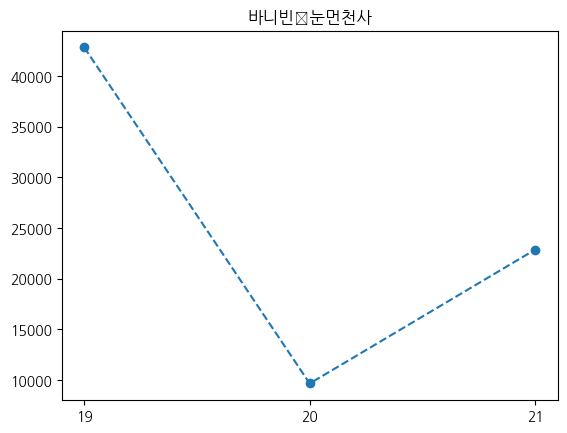

벤틀리23년식♠️신형♠️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


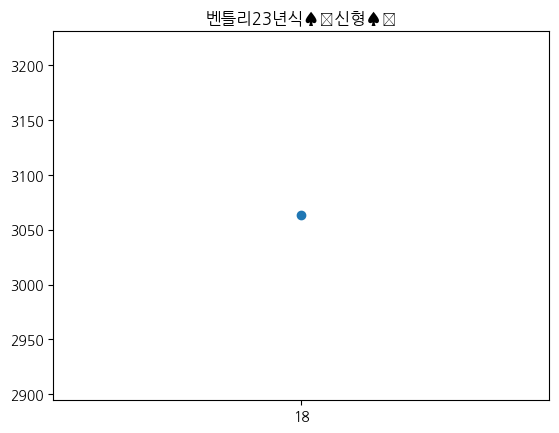

보기드문10새끼


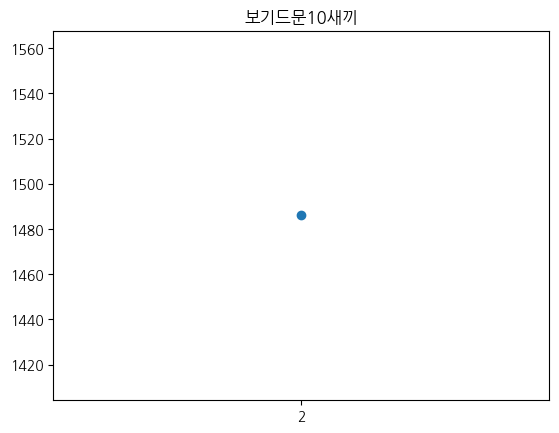

봉뉴진_견우견우


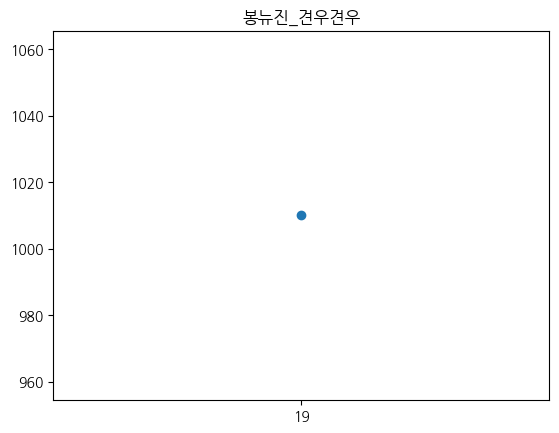

붘칰밬칰


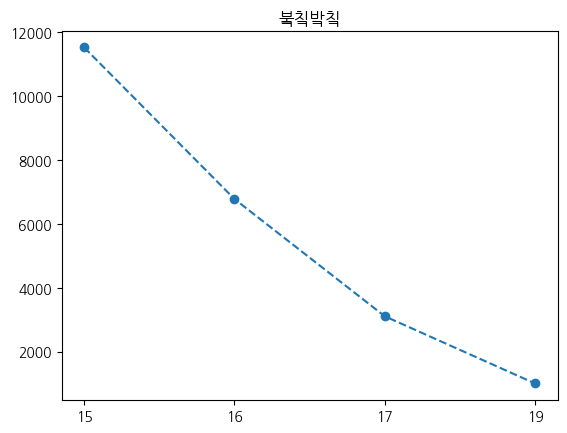

서나인ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


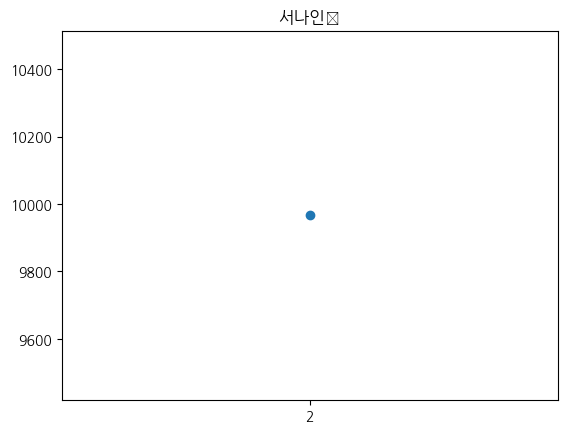

서와와ෆ입술


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


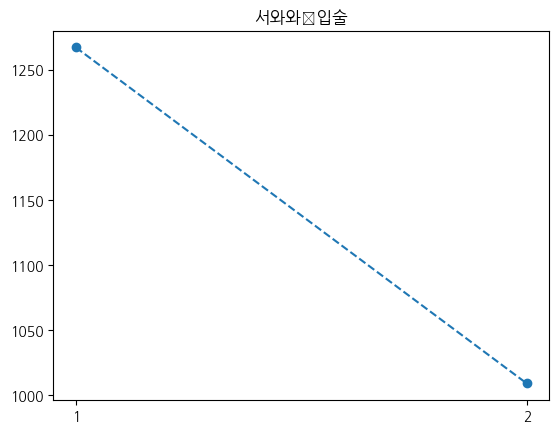

소야ღ푸시


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


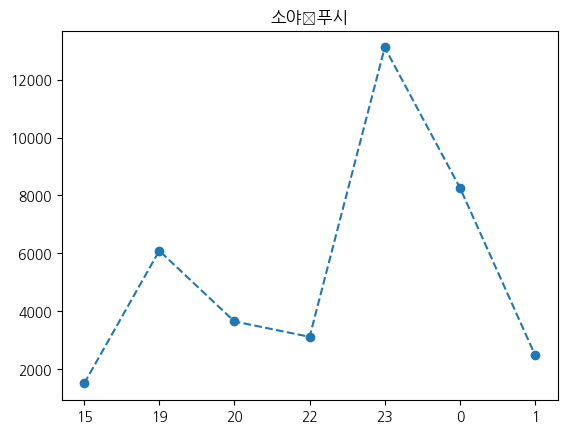

솔이⛧ZI존z


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


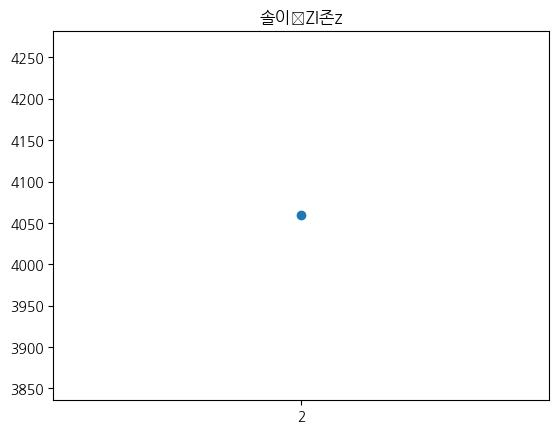

은채궁에하트터는김루팡


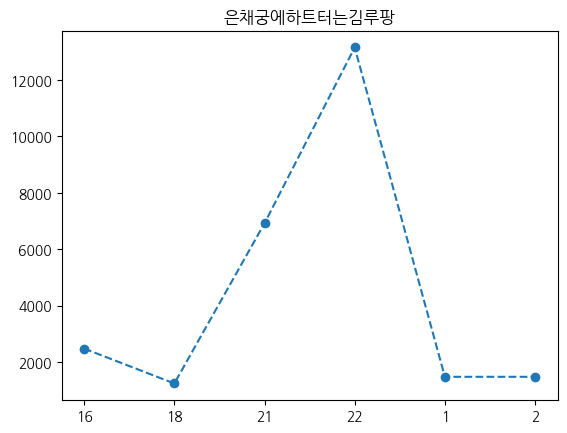

은채의개ღ리브


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


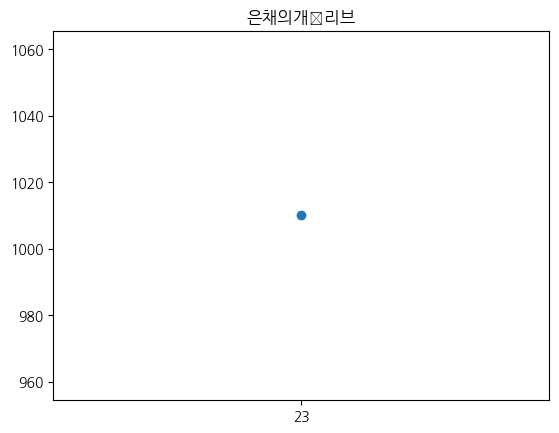

정윤슬➳❥Kix◡x


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9697 (\N{LOWER HALF CIRCLE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


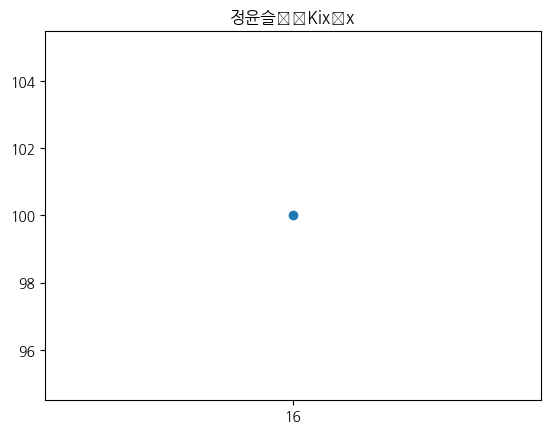

정윤슬➳❥지갑열혈컷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


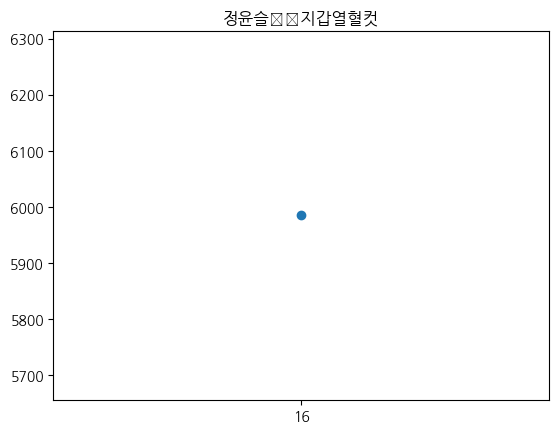

지원✨내눈에너만보여✨엘


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


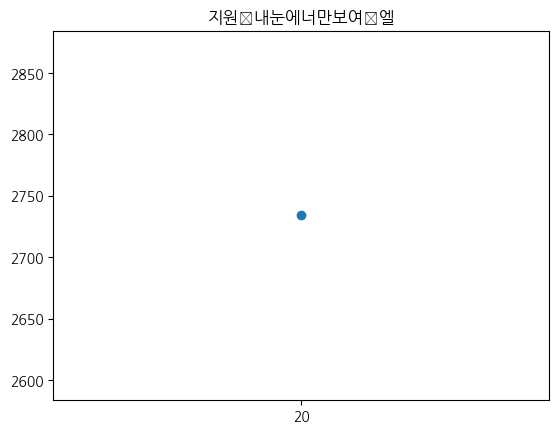

지원❥도끼맛바카스™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


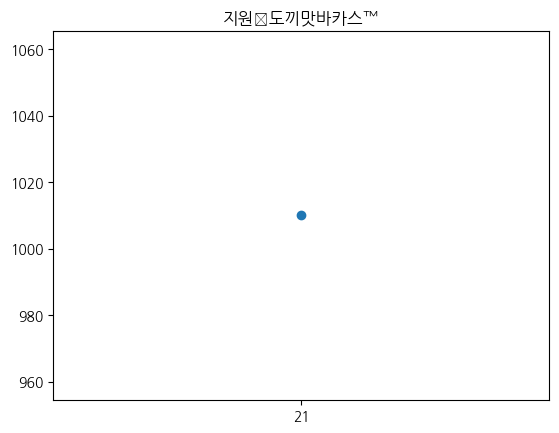

쫄보b


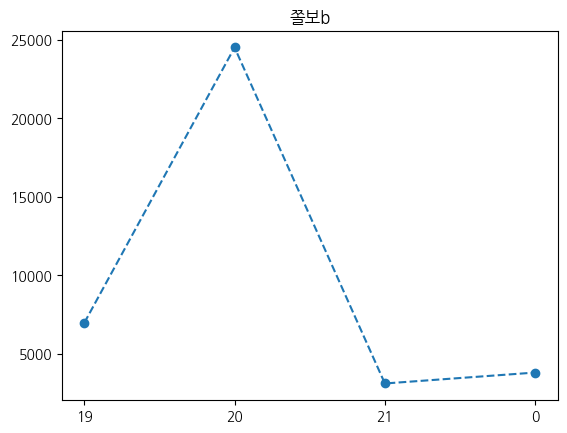

쫌만잘께요❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


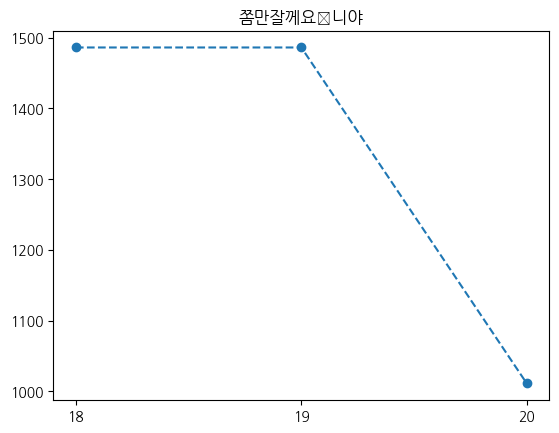

클라라☆환혼그림자


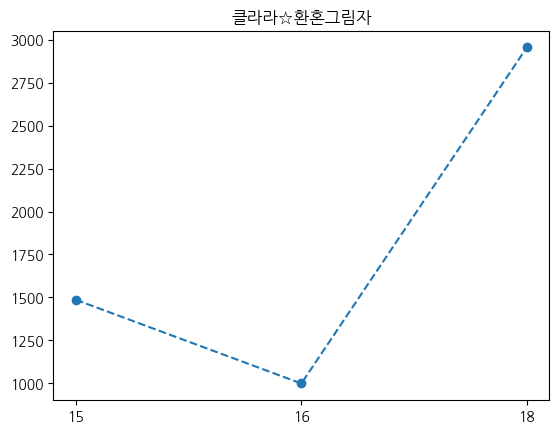

태이의작은손


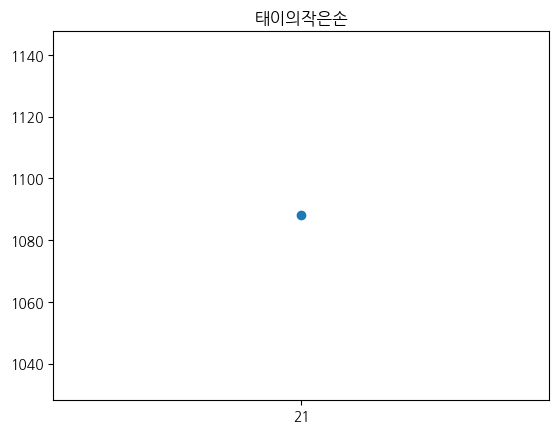

테라카쓰


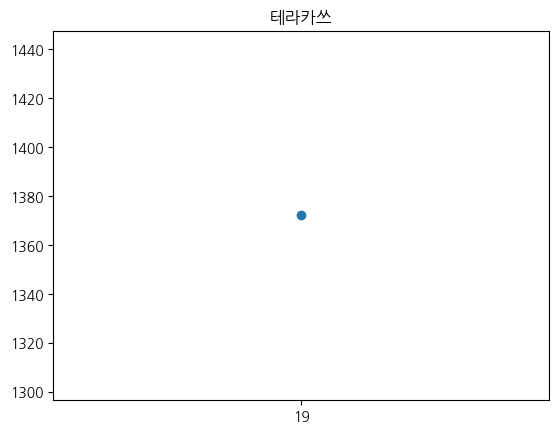

허리케인hj29


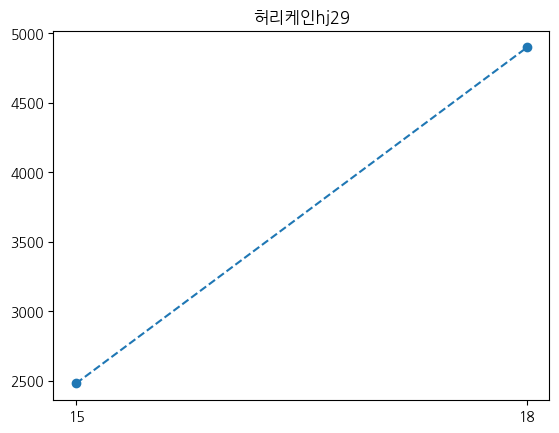

현생가용


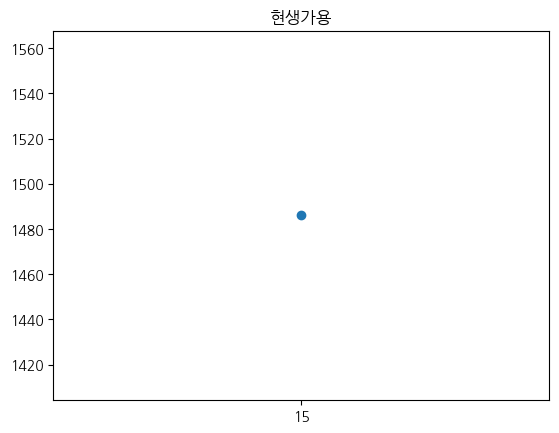

현생간농부


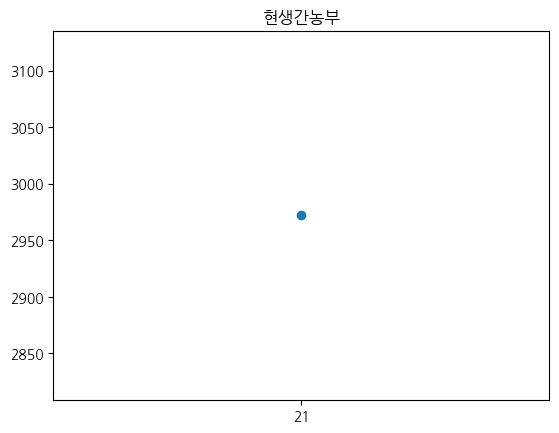

In [16]:
for i in VIP_list:
    VIP_time_df = re_df[re_df['후원 아이디(닉네임)']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    print(i)
    plt.plot(VIP_time_df['hour'],VIP_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

In [17]:
re_df2 = re_df.set_index('후원시간')

In [18]:
df_10m = pd.DataFrame()

df_10m['min'] = re_df2.후원하트.resample('10T').min()
df_10m['max'] = re_df2.후원하트.resample('10T').max()
df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
df_10m['median'] = re_df2.후원하트.resample('10T').median()
df_10m['sum'] = re_df2.후원하트.resample('10T').sum()

/tmp/ipykernel_76734/916355910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['min'] = re_df2.후원하트.resample('10T').min()
/tmp/ipykernel_76734/916355910.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['max'] = re_df2.후원하트.resample('10T').max()
/tmp/ipykernel_76734/916355910.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
/tmp/ipykernel_76734/916355910.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['median'] = re_df2.후원하트.resample('10T').median()
/tmp/ipykernel_76734/916355910.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['sum'] = re_df2.후원하트.resample('10T').sum()


In [19]:
df_10m

,min,max,mean,median,sum
후원시간,,,,,
2024-10-01 15:20:00,100.0,10004.0,2052.333333,1486.0,24628
2024-10-01 15:30:00,1011.0,3113.0,1814.666667,1486.0,10888
2024-10-01 15:40:00,1486.0,1486.0,1486.000000,1486.0,4458
2024-10-01 15:50:00,100.0,3113.0,1656.000000,1705.5,6624
2024-10-01 16:00:00,1486.0,2323.0,1653.400000,1486.0,8267
...,...,...,...,...,...
2024-10-02 02:20:00,1028.0,1267.0,1215.833333,1250.0,7295
2024-10-02 02:30:00,1009.0,1250.0,1058.000000,1010.0,5290
2024-10-02 02:40:00,1028.0,2181.0,1233.200000,1200.0,24664


## 6. 10분 집계당 시계열 통계 그래프

min


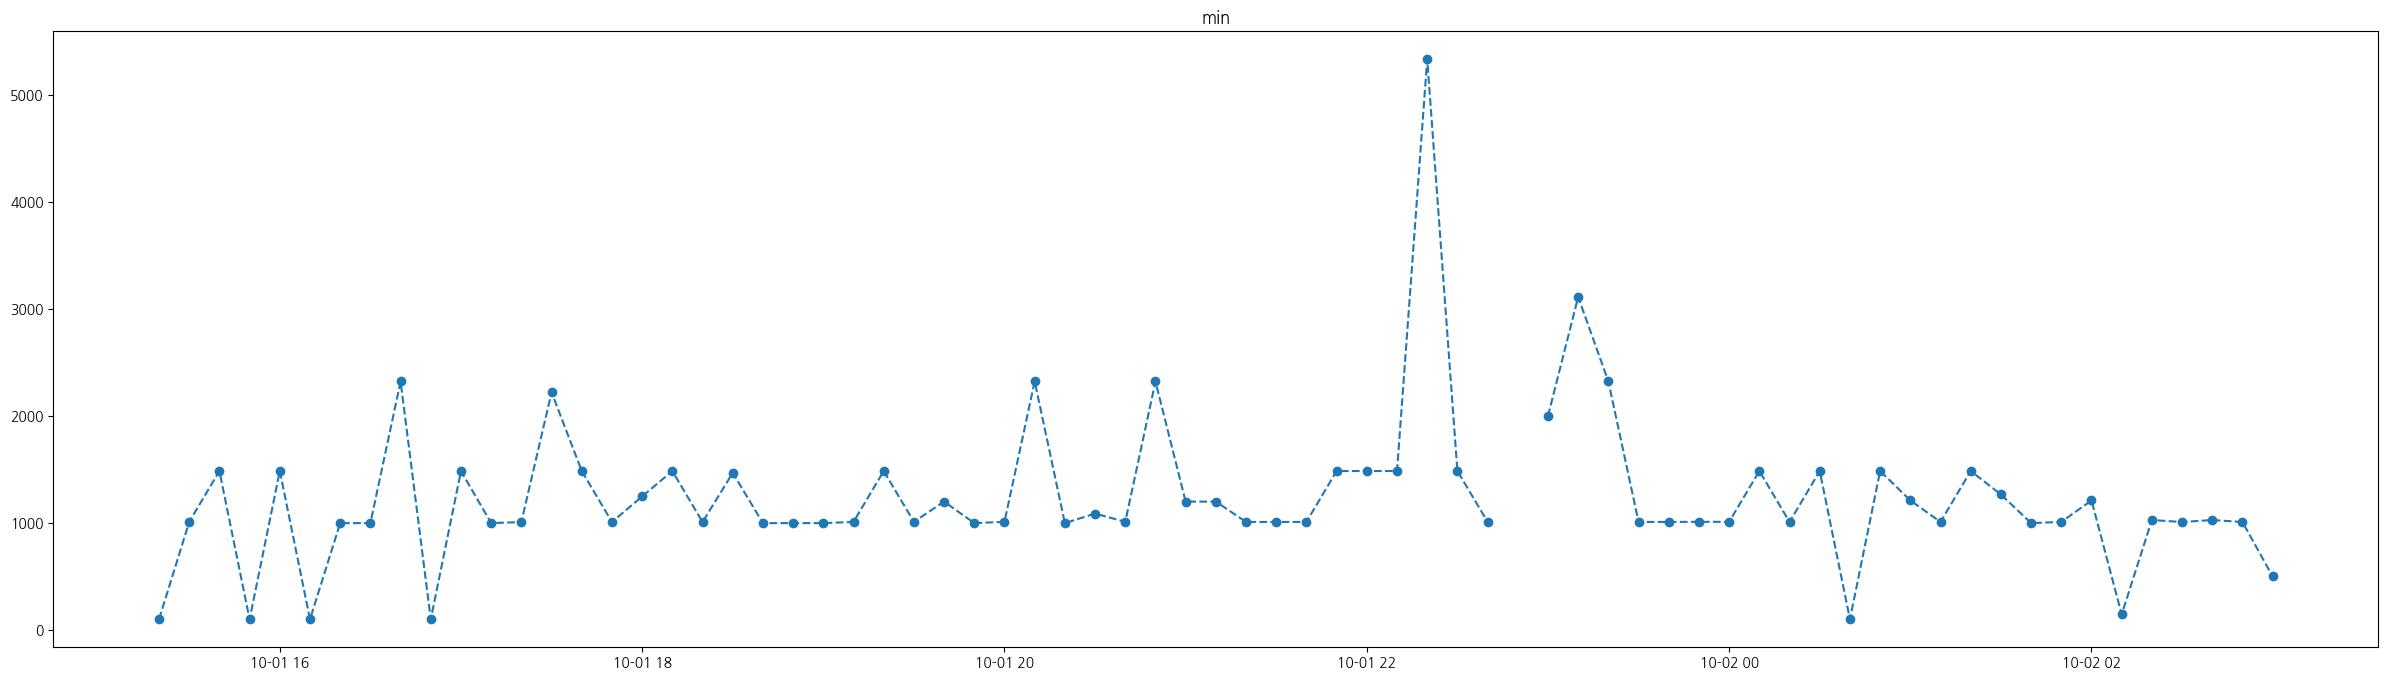

max


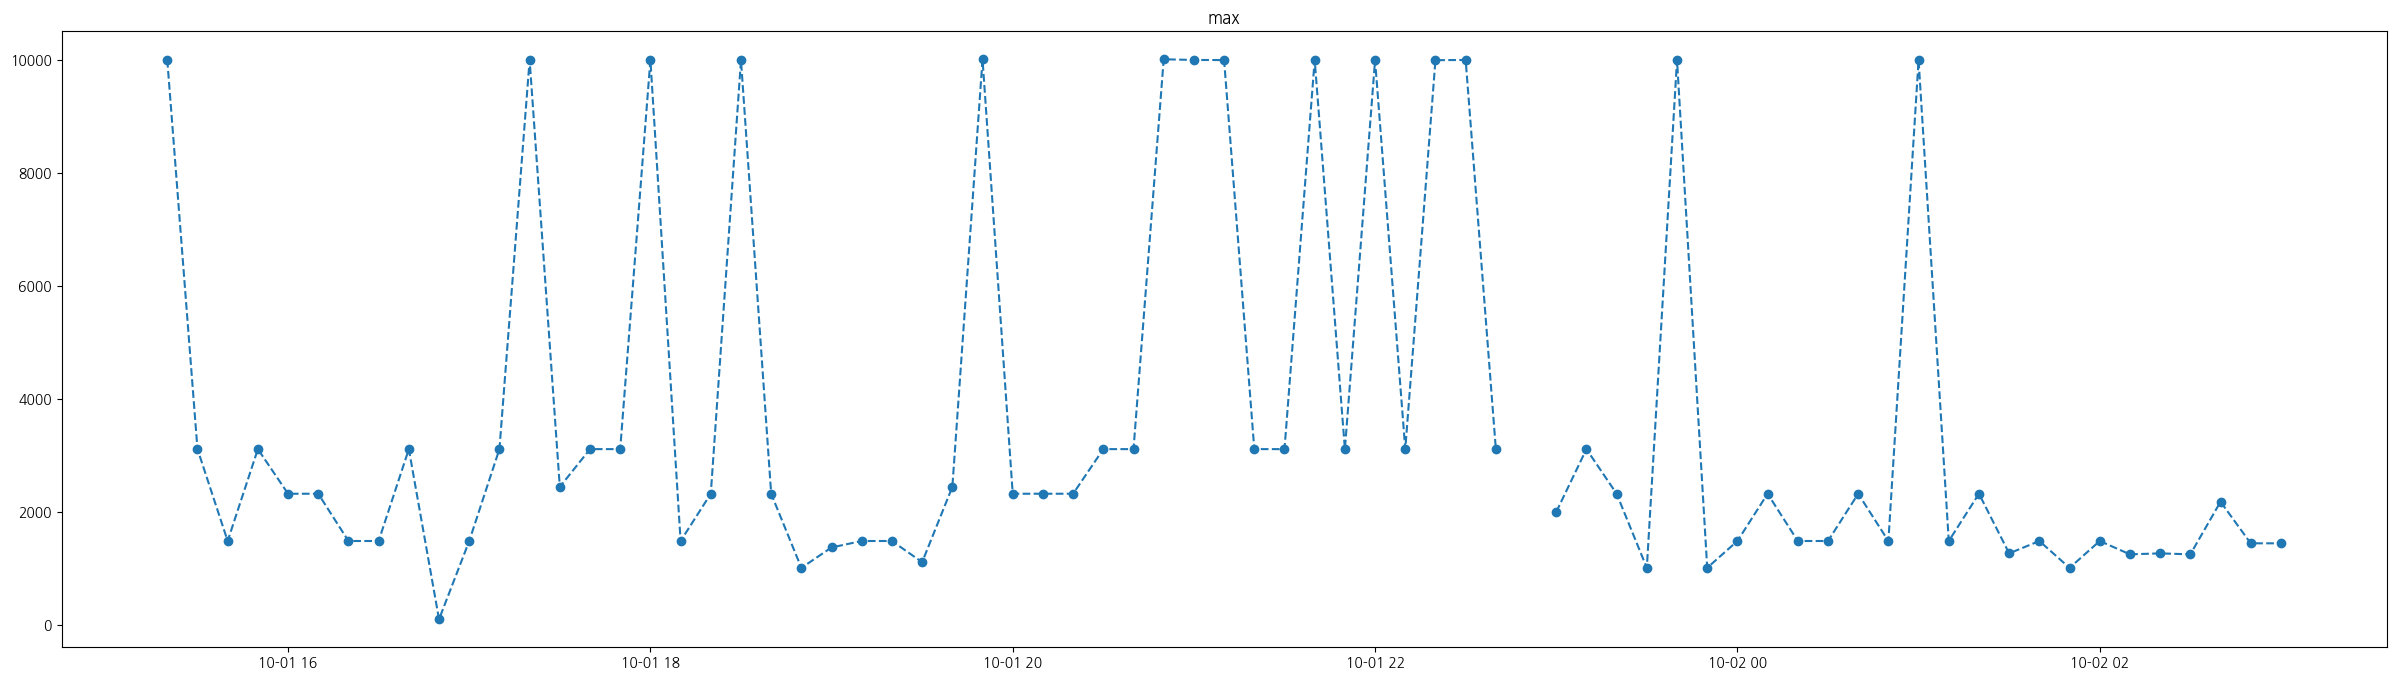

mean


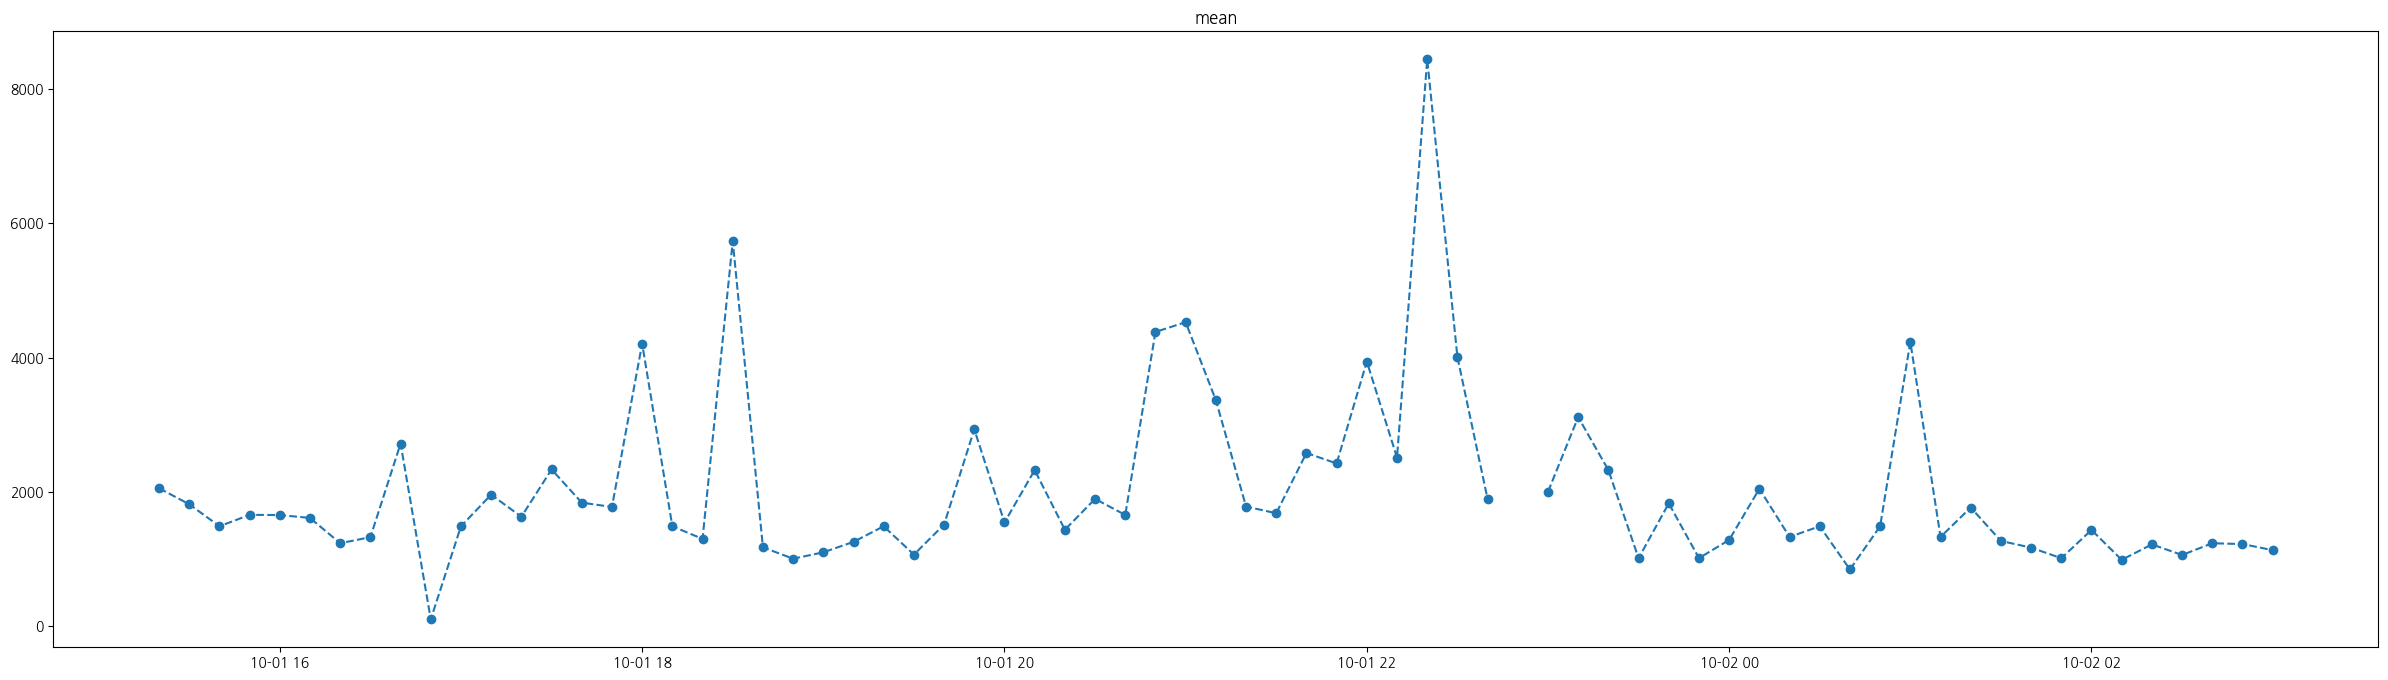

median


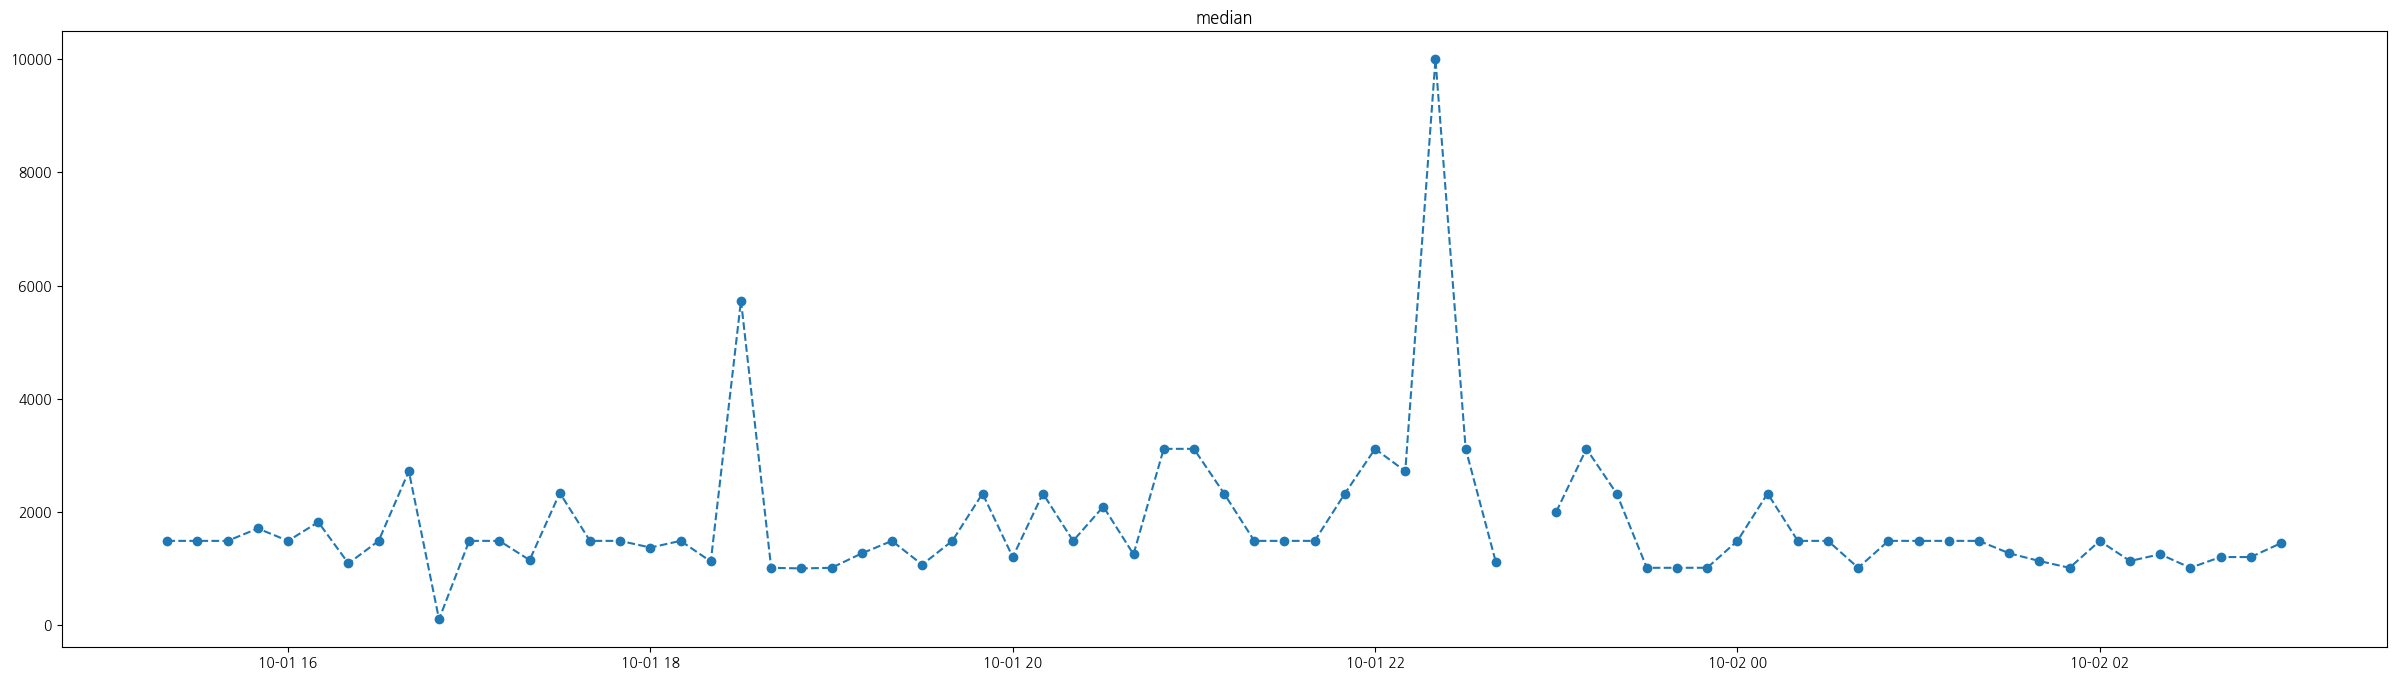

sum


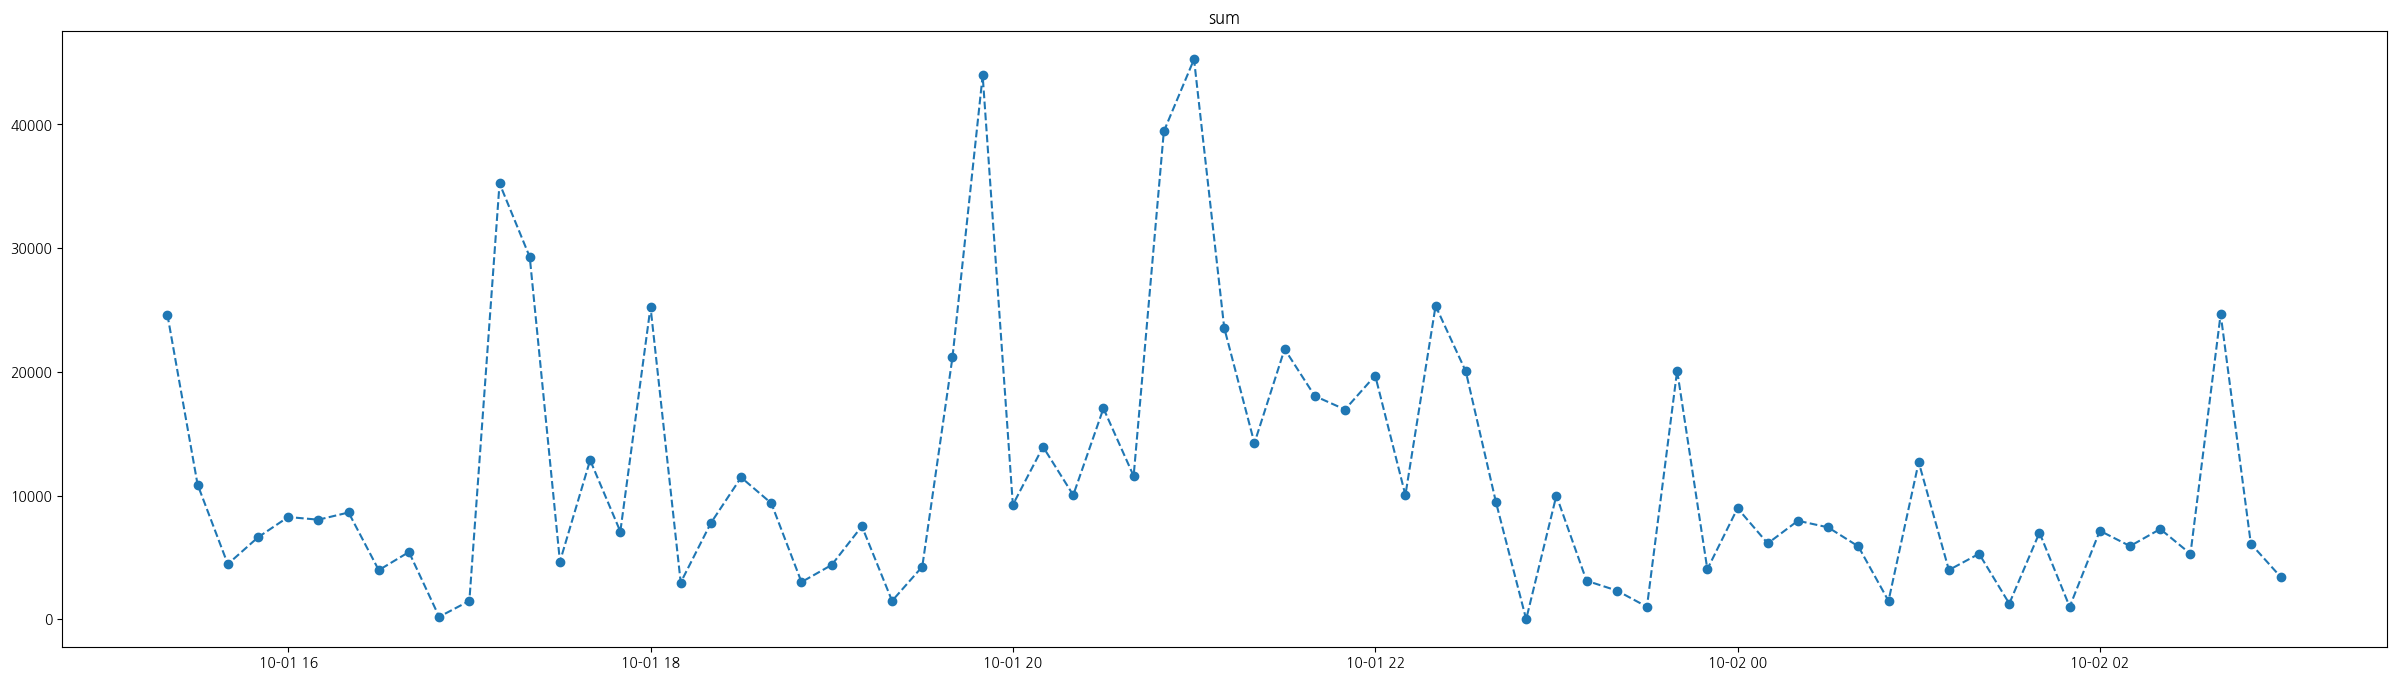

In [20]:
for i in list(df_10m.columns):
    print(i)
    plt.figure(figsize=(30,8))
    plt.plot(df_10m[i],linestyle='--',marker='o')
    plt.title(i)
    plt.show()